In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [24]:
# Load dataset
df = pd.read_csv("/Users/oakmoreroadinc./Desktop/Data Science /Portfolio Data Science /thp_explored_rmv_outliers.csv", index_col=0)


In [25]:
df.head()

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Category,Result Score,fraud_alert,sigma
0,1,M,-0.425201,0.113763,0.014711,-0.463621,0.147781,-0.214315,1.236359,0.847431,1.256908,264,Good,1,0.211725,0.398059
1,2,M,-0.156009,0.025946,0.208901,0.478853,-0.213461,0.239044,0.135644,-0.931528,-0.212610,467,Good,1,-0.031427,-0.067687
2,3,M,0.247779,0.377213,-0.179478,0.478853,-0.102310,0.541284,0.147874,-0.042048,1.469166,49,Bad,0,0.199038,-0.188250
3,4,M,-0.761690,-3.150093,-2.736307,-1.510815,-2.450383,-2.329992,-2.298160,-2.265747,-17.503189,908,Good,1,-2.450257,1.536353
4,5,F,1.055354,0.465030,0.581098,0.583573,-0.699749,0.616843,0.967295,0.847431,4.416875,241,Bad,0,0.615568,0.814614


In [26]:
# Change category data to numeric values
class_replace_values = {'Good': 1, 'Bad': 0}
df['Class'] = df['Category'].replace(class_replace_values)

sex_replace_values = {'M': 1, 'F': 0}
df['Sex'] = df['Gender'].replace(sex_replace_values)

#Ensure the changes are correct
print(df.head())

   Youth ID Gender       PWS        DL        SC        RC       HMM  \
0         1      M -0.425201  0.113763  0.014711 -0.463621  0.147781   
1         2      M -0.156009  0.025946  0.208901  0.478853 -0.213461   
2         3      M  0.247779  0.377213 -0.179478  0.478853 -0.102310   
3         4      M -0.761690 -3.150093 -2.736307 -1.510815 -2.450383   
4         5      F  1.055354  0.465030  0.581098  0.583573 -0.699749   

        WSL       CEP        LF  total_score  Days_in_Program Category  \
0 -0.214315  1.236359  0.847431     1.256908              264     Good   
1  0.239044  0.135644 -0.931528    -0.212610              467     Good   
2  0.541284  0.147874 -0.042048     1.469166               49      Bad   
3 -2.329992 -2.298160 -2.265747   -17.503189              908     Good   
4  0.616843  0.967295  0.847431     4.416875              241      Bad   

   Result Score  fraud_alert     sigma  Class  Sex  
0             1     0.211725  0.398059      1    1  
1             1 

In [27]:
# Define features to be used in the model
features = ['Sex', 'fraud_alert', 'sigma']

# Extract features for X and target variable for Y
X = df[features].values
Y = df['Class'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_scaled, Y)

# Apply bootstrapping to increase the number of observations
n_samples = 100  # Desired number of samples
df_resampled = pd.DataFrame(X_resampled, columns=features)
df_resampled['Class'] = Y_resampled
df_bootstrap = resample(df_resampled, replace=True, n_samples=n_samples, random_state=42)

In [29]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df_bootstrap[features].values, df_bootstrap['Class'].values, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (80, 3) (80,)
Test set: (20, 3) (20,)


In [30]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Bad (0)', 'Good (1)'])
    ax.yaxis.set_ticklabels(['Bad (0)', 'Good (1)'])
    plt.show()

In [32]:
# Function to print detailed evaluation metrics
def print_evaluation_metrics(model_name, y_true, y_pred):
    print(f"Evaluation Metrics for {model_name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.2f}")
    print("\n")

Logistic Regression - Best parameters: {'C': 1, 'solver': 'liblinear'}
Logistic Regression - Best accuracy score: 0.85
Evaluation Metrics for Logistic Regression:
Confusion Matrix:
[[10  2]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20

Accuracy: 0.90
Precision: 0.80
Recall: 1.00
F1-Score: 0.89




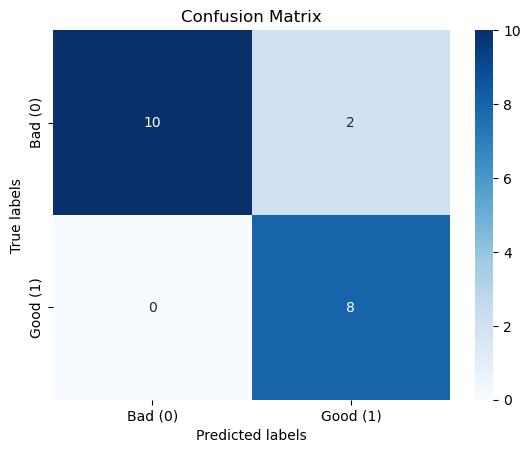

In [33]:
# Logistic Regression
logreg = LogisticRegression()
parameters = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}
grid_search = GridSearchCV(logreg, parameters, cv=10, scoring='accuracy')
logreg_cv = grid_search.fit(X_train, Y_train)
print("Logistic Regression - Best parameters:", logreg_cv.best_params_)
print("Logistic Regression - Best accuracy score:", logreg_cv.best_score_)
yhat_logreg = logreg_cv.predict(X_test)
print_evaluation_metrics("Logistic Regression", Y_test, yhat_logreg)
plot_confusion_matrix(Y_test, yhat_logreg)


### Confusion Matrix Analysis

This confusion matrix provides a detailed look at the predictions made by a classifier, categorizing outcomes into 'Bad (0)' and 'Good (1)'. The matrix includes a total of 20 predictions (10 + 2 + 0 + 8 = 20 instances).

**Matrix Details:**
- **True Negatives (TN):** The classifier correctly predicted 10 instances as 'Bad (0)'. These true negatives represent cases where both the actual and predicted outcomes were negative, demonstrating the classifier's effectiveness in identifying negative cases.
- **False Positives (FP):** There were 2 instances where the classifier incorrectly predicted 'Good (1)' for cases that were actually 'Bad (0)'. These are false positives, indicating errors in predicting negative outcomes.
- **False Negatives (FN):** There were 0 cases where the classifier incorrectly predicted 'Bad (0)' for instances that were actually 'Good (1)'. This shows that the model had no errors in recognizing positive outcomes.
- **True Positives (TP):** The classifier correctly identified 8 instances as 'Good (1)'. These true positives confirm the classifier's ability to accurately predict positive outcomes.

**Summary:**
The classifier performed with a high level of accuracy, correctly predicting a majority of the outcomes. The presence of 2 false positives highlights a small area for potential improvement in the model’s predictive accuracy. Overall, the classifier was highly effective in distinguishing between 'Bad' and 'Good' outcomes for most of the dataset, especially given that there were no false negatives.


In [46]:
# Application: Prediction with new input:
Sex=0
fraud_alert=0.04634
sigma=0.62327

new_input = [[Sex, fraud_alert, sigma]]  # Example input
new_input_scaled = scaler.transform(new_input)

In [47]:
# Predict using log regression:
new_output = logreg_cv.predict(new_input_scaled)
proba = logreg_cv.predict_proba(new_input_scaled)

# Extract the predicted probabilities of the first and second class
predicted_prob_0 = round(proba[0, 0] * 100, 2)
predicted_prob_1 = round(proba[0, 1] * 100, 2)

# Print the predicted class labels and probabilities as percentages
print("Predicted class label: ", new_output[0])
print("Predicted probability of class 0: ", predicted_prob_0, "%")
print("Predicted probability of class 1: ", predicted_prob_1, "%")

if new_output[0] == 0:
    print("The youth has a:", predicted_prob_0, "% chance of being discharged prior to expiration date.")
else:
    print("The youth has a:", predicted_prob_1, "% chance of successfully completing the program up to the expiration date.")

Predicted class label:  1
Predicted probability of class 0:  19.02 %
Predicted probability of class 1:  80.98 %
The youth has a: 80.98 % chance of successfully completing the program up to the expiration date.
